# Predicting Estimated ultimate recovery (EUR)


Estimated ultimate recovery (EUR) is an approximation of the quantity of oil or gas that is potentially recoverable or has already been recovered from a reserve or well.

In [27]:
#Import Libraries
from sklearn.impute import SimpleImputer
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2 , f_classif 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import median_absolute_error
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV

In [28]:
data=pd.read_csv('D:/python/my work/hoss/Chapter-6/Chapter 6/Chapter6_Shale Gas Wells.csv')
data

,Stage Spacing,bbl/ft,Well Spacing,Dip,Thickness,Lateral Length,Injection Rate,Porosity,ISIP,Water Saturation,Percentage of LG,Pressure Gradient,Proppant Loading,EUR
0,140,38,850,0,165,8543,64,8.3,8200,17.1,38.0,0.95,3012,13.3
1,140,30,900,0,174,8336,60,7.8,8061,16.0,59.3,0.95,2771,12.5
2,140,30,900,0,174,9361,65,7.8,8061,16.0,59.3,0.95,3067,16.9
3,140,30,950,0,175,9110,69,8.3,7922,15.7,66.9,0.95,3130,16.5
4,140,30,950,0,175,9310,67,8.3,7922,15.7,66.9,0.95,2991,17.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,140,30,750,0,160,8567,63,7.2,8200,16.6,86.5,0.95,2740,12.8
502,140,30,700,0,160,7932,61,7.2,8200,16.6,86.5,0.95,2774,12.2
503,140,30,700,0,160,9080,57,7.2,8200,16.6,86.5,0.95,2973,13.3
504,140,30,750,0,160,8836,58,7.2,8200,16.6,86.5,0.95,2925,12.7


importing the data 


In [29]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Stage Spacing,506.0,147.640316,18.392128,140.00,140.00,141.00,148.00,330.00
bbl/ft,506.0,35.134387,10.533197,30.00,30.00,30.00,36.00,75.00
Well Spacing,506.0,820.158103,135.736986,650.00,700.00,800.00,900.00,1350.00
Dip,506.0,0.069170,0.253994,0.00,0.00,0.00,0.00,1.00
Thickness,506.0,162.365613,15.471044,120.00,153.00,165.00,176.00,185.00
Lateral Length,506.0,8153.086957,942.393981,4500.00,7617.75,8051.00,8608.00,11500.00
Injection Rate,506.0,63.079051,7.250106,55.00,57.00,61.00,69.00,80.00
Porosity,506.0,7.337549,0.749451,5.50,6.60,7.50,8.00,8.50
ISIP,506.0,7010.490119,1211.452205,5000.00,5000.00,7643.00,7783.00,8200.00
Water Saturation,506.0,19.213439,3.198579,15.00,16.80,17.70,24.10,25.00


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Stage Spacing      506 non-null    int64  
 1   bbl/ft             506 non-null    int64  
 2   Well Spacing       506 non-null    int64  
 3   Dip                506 non-null    int64  
 4   Thickness          506 non-null    int64  
 5   Lateral Length     506 non-null    int64  
 6   Injection Rate     506 non-null    int64  
 7   Porosity           506 non-null    float64
 8   ISIP               506 non-null    int64  
 9   Water Saturation   506 non-null    float64
 10  Percentage of LG   506 non-null    float64
 11  Pressure Gradient  506 non-null    float64
 12  Proppant Loading   506 non-null    int64  
 13  EUR                506 non-null    float64
dtypes: float64(5), int64(9)
memory usage: 55.5 KB


there is no nulls 

to show the relation between the features , we can use Correlation matrix 

<AxesSubplot:>

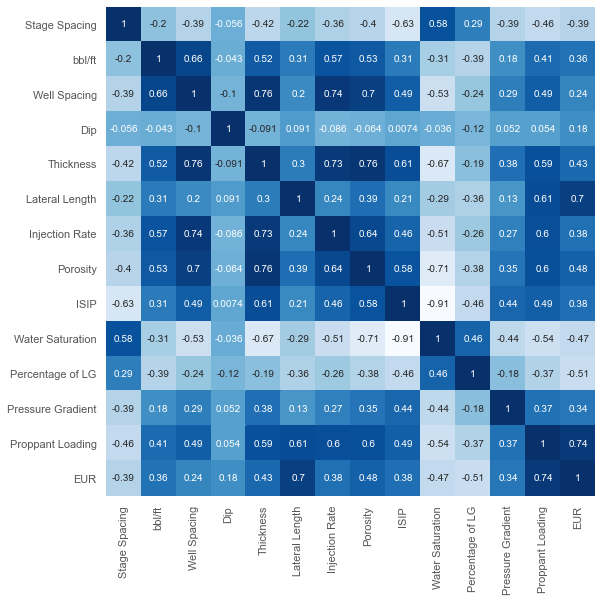

In [31]:
import seaborn as sns 

#correlation matrix
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True,cmap="Blues",annot=True,cbar=False)

to visualize the relations , use Pair plot 

D:\python\New folder\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


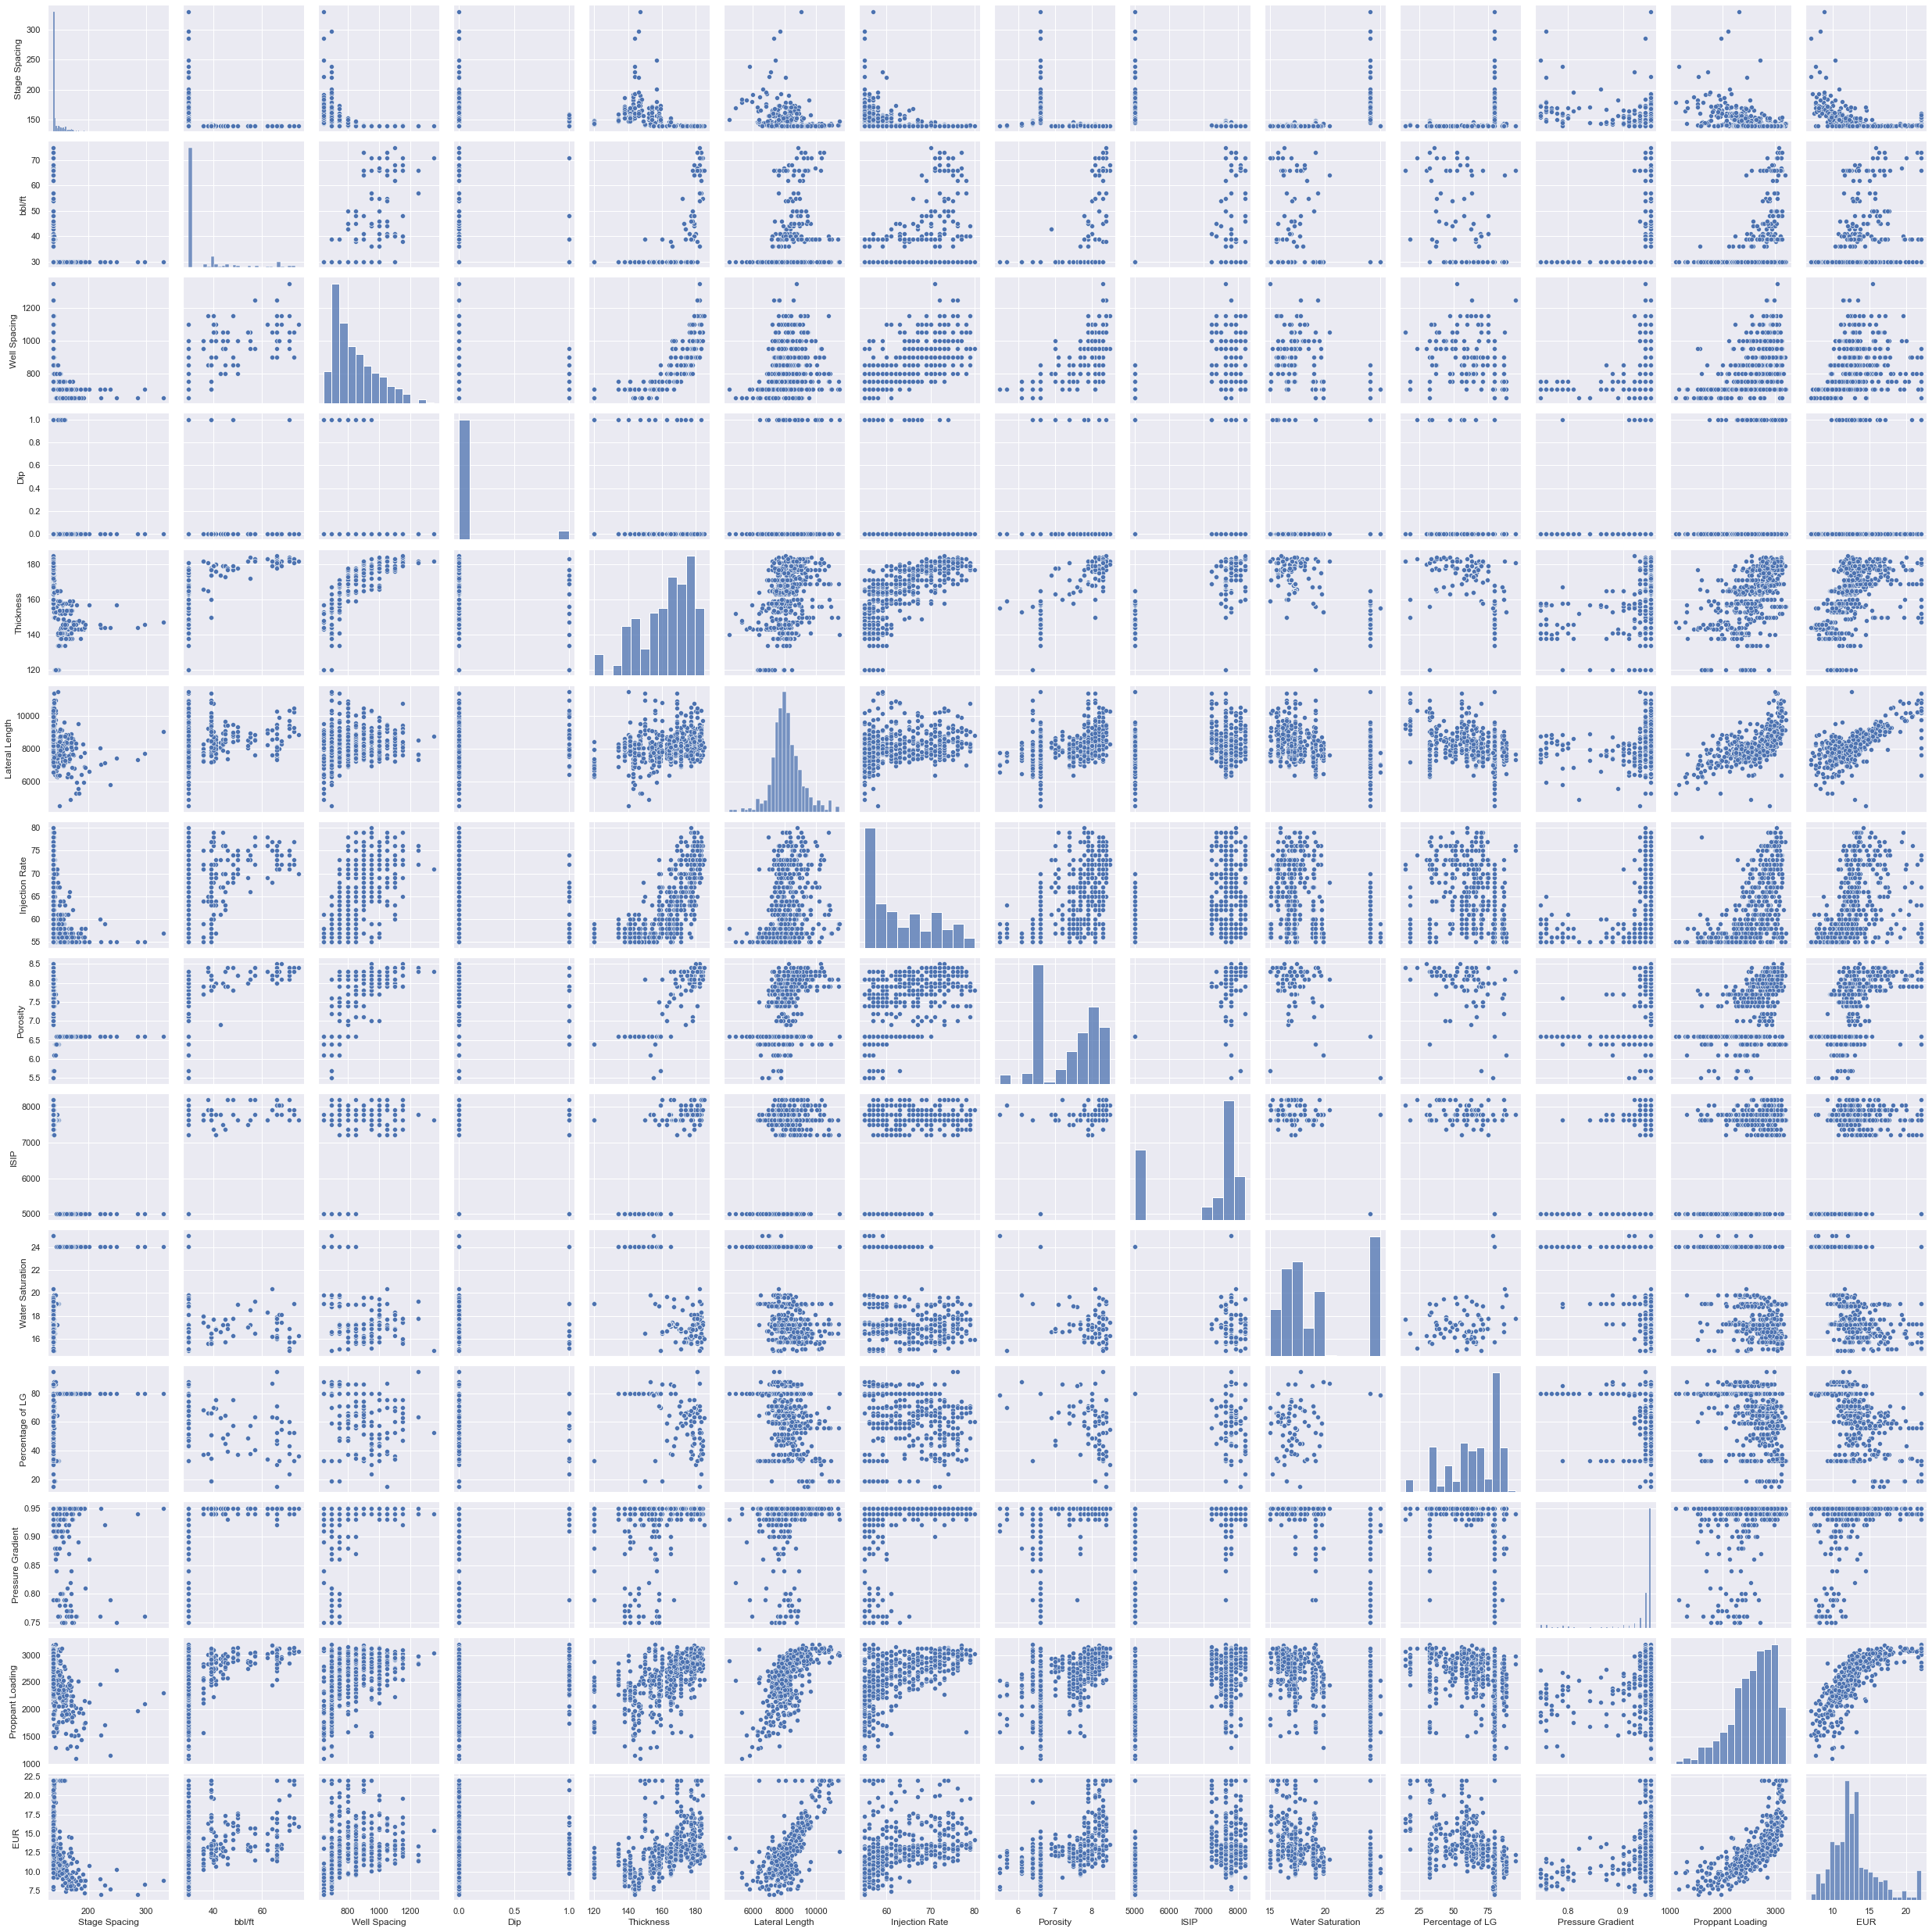

In [32]:
sns.set()
sns.pairplot(data, size = 2.5)
plt.show()

for knowing the strong direct and strong inverse relation with EUR 

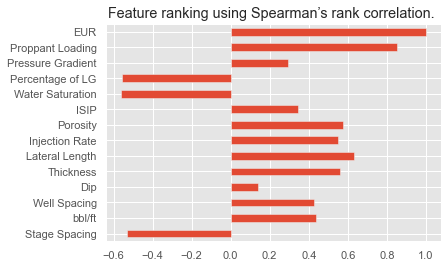

In [33]:
plt.style.use('ggplot')
from scipy import stats
rho, pval=stats.spearmanr(data)
corr=pd.Series(rho[:14,13], index=data.columns)
corr.plot(kind='barh') 
plt.title("Feature ranking using Spearman’s rank correlation. ")
plt.show()

### from the feature ranking ,pair plot and corelation mtrix , you can find that:
-Proppant Loading feature has strong direct relation with EUR 
-stage spacing ,Water saturation and percentage of LG features have indirect relation with EUR 
-there is no strong relation between Dip and EUR so delete dip


In [ ]:
data = data.drop("Dip", axis=1)
data.shape

let y be EUR column  


In [ ]:
y=data.iloc[:,12]
#y=y.values.reshape(-1,1)
#y.shape
y=data.iloc[:,12].values
y

In [ ]:
X=data.iloc[:,:12]
#X.shape
X

Using partial dependence to show the most important factors in EUR

In [37]:
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPRegressor
from sklearn.inspection import partial_dependence
from sklearn.inspection import plot_partial_dependence
from sklearn.preprocessing import MinMaxScaler

In [38]:
X.columns

Index(['Stage Spacing', 'bbl/ft', 'Well Spacing', 'Thickness',
       'Lateral Length', 'Injection Rate', 'Porosity', 'ISIP',
       'Water Saturation', 'Percentage of LG', 'Pressure Gradient',
       'Proppant Loading'],
      dtype='object')

Test R2 score: 0.76


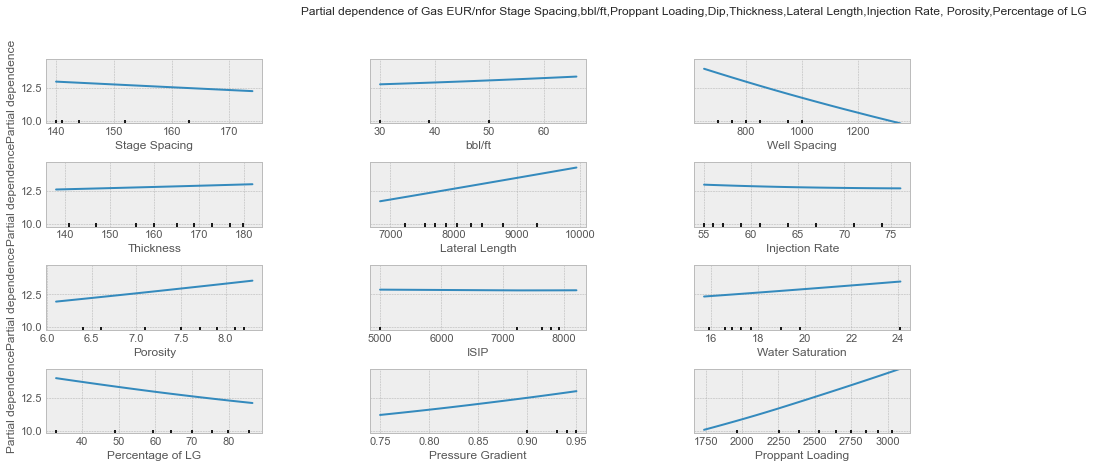

In [46]:
plt.style.use('bmh')
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size
=0.25)
model=make_pipeline(MinMaxScaler(), MLPRegressor(hidden_layer_sizes=(25,25),
                                 learning_rate_init=0.01,
                                 early_stopping=True,max_iter=500))
model.fit(X_train, y_train)
print("Test R2 score: {:.2f}".format(model.score(X_test, y_test)))
features=['Stage Spacing', 'bbl/ft', 'Well Spacing', 'Thickness',
       'Lateral Length', 'Injection Rate', 'Porosity', 'ISIP',
       'Water Saturation', 'Percentage of LG', 'Pressure Gradient',
       'Proppant Loading']

plot_partial_dependence(model,X, features,
                        n_jobs=3, grid_resolution=20)
fig = plt.gcf()

fig.suptitle('Partial dependence of Gas EUR/n' 'for Stage Spacing,bbl/ft,Proppant Loading,Dip,Thickness,Lateral Length,Injection Rate, Porosity,Percentage of LG')

 
fig.subplots_adjust(hspace=.6,wspace=.5,top=.8,bottom=-.5,right=1,left=-1)


from the partial dependance plot we can see that 'Proppant Loading','Lateral Length',Well spacing 
are the most important features for predicting EUR 


D:\python\New folder\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Test R2 score: 0.77


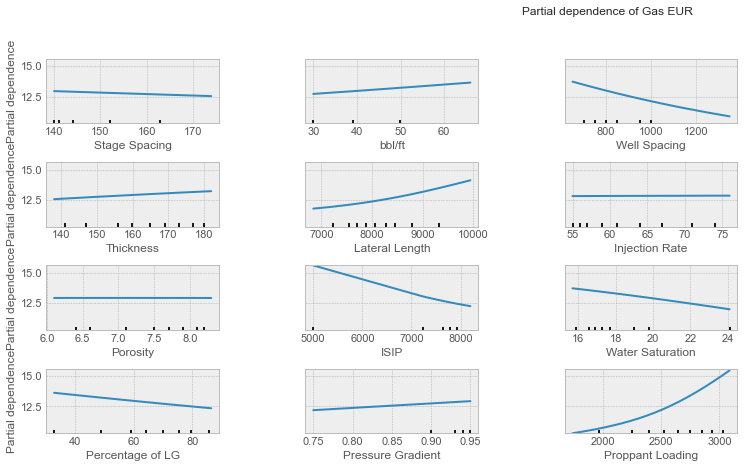

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size
=0.25)
model=make_pipeline(MinMaxScaler(), MLPRegressor(activation='tanh', # can be also identity , logistic , relu,tanh
                                 solver='lbfgs',  # can be also sgd , adam,lbfgs
                                 learning_rate='constant', # can be also invscaling , adaptive
                                 early_stopping= False,
                                 alpha=10 ,hidden_layer_sizes=(100, 3),random_state=33,max_iter=1000))
model.fit(X_train, y_train)
print("Test R2 score: {:.2f}".format(model.score(X_test, y_test)))
features=['Stage Spacing', 'bbl/ft', 'Well Spacing', 'Thickness',
       'Lateral Length', 'Injection Rate', 'Porosity', 'ISIP',
       'Water Saturation', 'Percentage of LG', 'Pressure Gradient',
       'Proppant Loading']

plot_partial_dependence(model,X, features,
                        n_jobs=3, grid_resolution=20)
fig = plt.gcf()

fig.suptitle('Partial dependence of Gas EUR')

 
fig.subplots_adjust(hspace=.6,wspace=.5,top=.8,bottom=-.5,right=.8,left=-.8)

from the partial dependance plot we can see that 'Proppant Loading','Lateral Length',Well spacing 
are the most important features for predicting EUR 

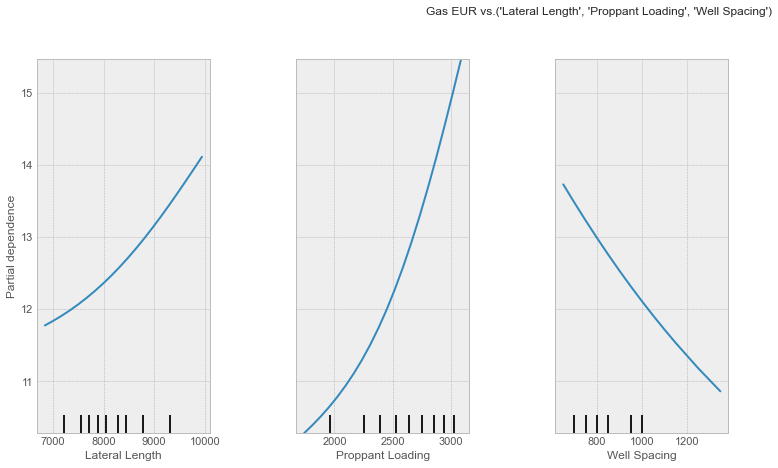

In [68]:
imp_features=[('Lateral Length','Proppant Loading','Well Spacing')]
for item in imp_features:
    plot_partial_dependence(model,X, item, n_jobs=3, 
    grid_resolution=20)
    fig=plt.gcf()
    fig.suptitle(f'Gas EUR vs.{item}')
    fig.subplots_adjust(hspace=.6,wspace=.5,top=.8,bottom=-.5,right=.8,left=-.8)

Text(0.5, 0.98, 'Gas EUR vs.Well Spacing and Proppant Loading')

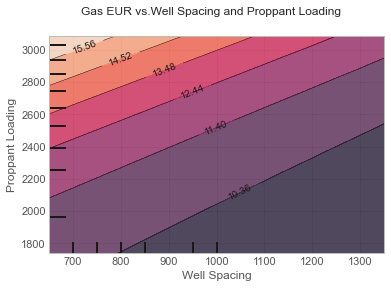

In [75]:
imp_features=[('Well Spacing','Proppant Loading')]
plot_partial_dependence(model,X,imp_features, n_jobs=3, 
grid_resolution=20)
fig=plt.gcf()
fig.suptitle('Gas EUR vs.Well Spacing and Proppant Loading')

<ipython-input-82-6041f8bda29f>:11: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  surf=ax.plot_surface(XX, YY, Z, rstride=1, cstride=1, cmap=plt.cm.


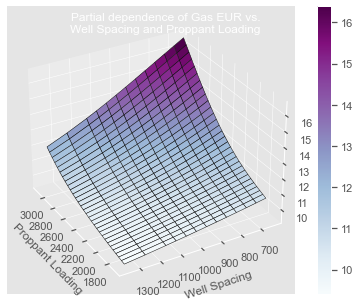

In [82]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure()
features1=('Proppant Loading', 'Well Spacing')
pdp, axes=partial_dependence(model, X_train, features=features1,
grid_resolution=30)

XX, YY=np.meshgrid(axes[0], axes[1])
Z=pdp[0].T

ax=Axes3D(fig)
surf=ax.plot_surface(XX, YY, Z, rstride=1, cstride=1, cmap=plt.cm.
BuPu, edgecolor='k0')
ax.set_xlabel(features1[0])
ax.set_ylabel(features1[1])
ax.set_zlabel('Gas EUR')
ax.view_init(elev=30, azim=150)
plt.colorbar(surf)
plt.suptitle('Partial dependence of Gas EUR vs.\n' 'Well Spacing and Proppant Loading')

plt.subplots_adjust(top=1)
plt.show()

Text(0.5, 0.98, 'Gas EUR vs. Lateral Length and Proppant Loading')

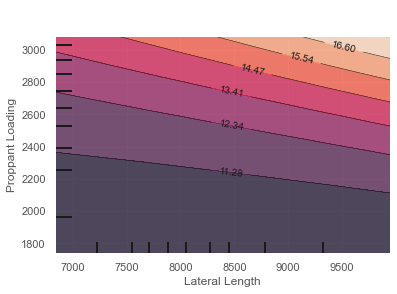

In [78]:
plt.style.use('ggplot')
imp_features=[('Lateral Length','Proppant Loading')]
plot_partial_dependence(model,X, imp_features, n_jobs=3, 
grid_resolution=20)
fig=plt.gcf()
fig.suptitle('Gas EUR vs. Lateral Length and Proppant Loading')

<ipython-input-79-1bcf5f229fb0>:11: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  surf=ax.plot_surface(XX, YY, Z, rstride=1, cstride=1, cmap=plt.cm.


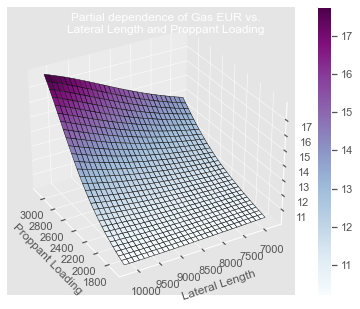

In [79]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure()
features1=('Proppant Loading', 'Lateral Length')
pdp, axes=partial_dependence(model, X_train, features=features1,
grid_resolution=30)

XX, YY=np.meshgrid(axes[0], axes[1])
Z=pdp[0].T

ax=Axes3D(fig)
surf=ax.plot_surface(XX, YY, Z, rstride=1, cstride=1, cmap=plt.cm.
BuPu, edgecolor='k0')
ax.set_xlabel(features1[0])
ax.set_ylabel(features1[1])
ax.set_zlabel('Gas EUR')
ax.view_init(elev=30, azim=150)
plt.colorbar(surf)
plt.suptitle('Partial dependence of Gas EUR vs.\n' 'Lateral Length and Proppant Loading')

plt.subplots_adjust(top=1)
plt.show()

In [85]:

#Standard Scaler for Data

scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
X = scaler.fit_transform(X)

#showing data
print('X \n' , X[:10])
print('y \n' , y[:10])


X 
 [[-0.4158234   0.27232458  0.22006846  0.17044709  0.41415683  0.12715125
   1.28547887  0.98285927 -0.66139688 -1.45823167  0.42493833  1.07632544]
 [-0.4158234  -0.48793053  0.58879243  0.7527547   0.1942861  -0.42511082
   0.61766336  0.8680074  -1.00563991 -0.30122632  0.42493833  0.49333117]
 [-0.4158234  -0.48793053  0.58879243  0.7527547   1.28301796  0.26521676
   0.61766336  0.8680074  -1.00563991 -0.30122632  0.42493833  1.20937393]
 [-0.4158234  -0.48793053  0.9575164   0.81745555  1.01641143  0.81747882
   1.28547887  0.75315552 -1.09952437  0.11160188  0.42493833  1.36177492]
 [-0.4158234  -0.48793053  0.9575164   0.81745555  1.22884691  0.54134779
   1.28547887  0.75315552 -1.09952437  0.11160188  0.42493833  1.02552511]
 [-0.4158234  -0.48793053  0.9575164   0.81745555  0.20703223  0.40328228
   1.28547887  0.75315552 -1.09952437  0.11160188  0.42493833  1.04245855]
 [-0.4158234   0.0822608   0.9575164   0.23514794 -0.3888493   0.12715125
   0.48410026  0.5226255  -0

In [86]:
#Splitting data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=44, shuffle =True)

#Splitted Data
#print('X_train shape is ' , X_train.shape)
#print('X_test shape is ' , X_test.shape)
#print('y_train shape is ' , y_train.shape)
#print('y_test shape is ' , y_test.shape)

In [87]:
#Applying Linear Regression Model 

LinearRegressionModel= LinearRegression(fit_intercept=True, normalize=True,copy_X=True,n_jobs=-1)
LinearRegressionModel.fit(X_train, y_train)

#Calculating Details
#print('Linear Regression Train Score is : ' , LinearRegressionModel.score(X_train, y_train))
#print('Linear Regression Test Score is : ' , LinearRegressionModel.score(X_test, y_test))
#print('Linear Regression Coef is : ' , LinearRegressionModel.coef_)
#print('Linear Regression intercept is : ' , LinearRegressionModel.intercept_)

score_LRM =LinearRegressionModel.score(X_test, y_test)


#print(score_LRM)
#Calculating Prediction
y_pred = LinearRegressionModel.predict(X_test)
#print('Predicted Value for Linear Regression is : ' , y_pred[:10])
#Calculating Mean Absolute Error

MAEValue_LRM = mean_absolute_error(y_test, y_pred, multioutput='uniform_average') # it can be raw_values

#print('Mean Absolute Error Value is : ', MAEValue_LRM)


In [88]:
#Applying SGDRegressor Model 

'''
sklearn.linear_model.SGDRegressor(loss='squared_loss’, penalty=’l2’, alpha=0.0001,
                                  l1_ratio=0.15, fit_intercept=True, max_iter=None,
                                  tol=None, shuffle=True, verbose=0, epsilon=0.1,
                                  random_state=None, learning_rate='invscaling’,
                                  eta0=0.01, power_t=0.25, early_stopping=False,
                                  validation_fraction=0.1, n_iter_no_change=5,
                                  warm_start=False, average=False, n_iter=None)
'''

SGDRegressionModel = SGDRegressor(alpha=.0001,random_state=33,penalty='l1',max_iter=1000)
SGDRegressionModel.fit(X_train, y_train)

#Calculating Details
#print('SGD Regression Train Score is : ' , SGDRegressionModel.score(X_train, y_train))
#print('SGD Regression Test Score is : ' , SGDRegressionModel.score(X_test, y_test))
#print('SGD Regression Coef is : ' , SGDRegressionModel.coef_)
#print('SGD Regression intercept is : ' , SGDRegressionModel.intercept_)
#print('----------------------------------------------------')

score_SGD=SGDRegressionModel.score(X_test, y_test)
#Calculating Prediction
y_pred = SGDRegressionModel.predict(X_test)
#print('Predicted Value for SGD Regression is : ' , y_pred[:10])


#Calculating Mean Absolute Error

MAEValue_SGD = mean_absolute_error(y_test, y_pred, multioutput='uniform_average') # it can be raw_values

#print('Mean Absolute Error Value is : ', MAEValue_LRM)

In [89]:
#Applying Lasso Regression Model 

'''
sklearn.linear_model.Lasso(alpha=1.0, fit_intercept=True, normalize=False, precompute=
                           False, copy_X=True, max_iter=1000, tol=0.0001,
                           warm_start=False, positive=False, random_state=None,selection='cyclic')
'''

LassoRegressionModel = Lasso(alpha=.0001,random_state=33,normalize=True)
LassoRegressionModel.fit(X_train, y_train)

#Calculating Details
#print('Lasso Regression Train Score is : ' , LassoRegressionModel.score(X_train, y_train))
#print('Lasso Regression Test Score is : ' , LassoRegressionModel.score(X_test, y_test))
#print('Lasso Regression Coef is : ' , LassoRegressionModel.coef_)
#print('Lasso Regression intercept is : ' , LassoRegressionModel.intercept_)
#print('----------------------------------------------------')
score_LAS=LassoRegressionModel.score(X_test, y_test)
#Calculating Prediction
y_pred = LassoRegressionModel.predict(X_test)
#print('Predicted Value for Lasso Regression is : ' , y_pred[:10])
#Calculating Mean Absolute Error

MAEValue_LAS = mean_absolute_error(y_test, y_pred, multioutput='uniform_average') # it can be raw_values

#print('Mean Absolute Error Value is : ', MAEValue_LAS)

In [ ]:
#Applying Random Forest Regressor Model 

'''
sklearn.ensemble.RandomForestRegressor(n_estimators='warn', criterion=’mse’, max_depth=None,
                                       min_samples_split=2, min_samples_leaf=1,min_weight_fraction_leaf=0.0,
                                       max_features=’auto’, max_leaf_nodes=None,min_impurity_decrease=0.0,
                                       min_impurity_split=None, bootstrap=True,oob_score=False, n_jobs=None,
                                       random_state=None, verbose=0,warm_start=False)
'''
#max_features : {"auto", "sqrt", "log2"}
RandomForestRegressorModel = RandomForestRegressor(n_estimators=10000,max_depth=30, random_state=33,max_features="log2")
RandomForestRegressorModel.fit(X_train, y_train)

#Calculating Details
#print('Random Forest Regressor Train Score is : ' , RandomForestRegressorModel.score(X_train, y_train))
#print('Random Forest Regressor Test Score is : ' , RandomForestRegressorModel.score(X_test, y_test))
#print('Random Forest Regressor No. of features are : ' , RandomForestRegressorModel.n_features_)
#print('----------------------------------------------------')
score_RFR=RandomForestRegressorModel.score(X_test, y_test)
#Calculating Prediction
y_pred = RandomForestRegressorModel.predict(X_test)
#print('Predicted Value for Random Forest Regressor is : ' , y_pred[:10])

#Calculating Mean Absolute Error

MAEValue_RFR = mean_absolute_error(y_test, y_pred, multioutput='uniform_average') # it can be raw_values

#print('Mean Absolute Error Value is : ', MAEValue_RFR)

In [ ]:
#Applying SVR Model 

'''
sklearn.svm.SVR(kernel=’rbf’, degree=3, gamma=’auto_deprecated’, coef0=0.0, tol=0.001,
                C=1.0, epsilon=0.1, shrinking=True, cache_size=200, verbose=False,max_iter=-1)
'''

SVRModel = SVR(C = 10 ,epsilon=0.1,kernel = 'rbf') # it also can be : linear, poly, rbf, sigmoid, precomputed
SVRModel.fit(X_train, y_train)

#Calculating Details
#print('SVRModel Train Score is : ' , SVRModel.score(X_train, y_train))
#print('SVRModel Test Score is : ' , SVRModel.score(X_test, y_test))

score_SVR= SVRModel.score(X_test, y_test)

#Calculating Prediction
y_pred = SVRModel.predict(X_test)
#print('Predicted Value for SVRModel is : ' , y_pred[:10])


#Calculating Mean Absolute Error

MAEValue_SVR = mean_absolute_error(y_test, y_pred, multioutput='uniform_average') # it can be raw_values

#print('Mean Absolute Error Value is : ', MAEValue_SVR)

In [ ]:
#Applying MLPRegressor Model 

'''
sklearn.neural_network.MLPRegressor(hidden_layer_sizes=(100, ), activation='relu’, solver=’adam’,
                                    alpha=0.0001,batch_size='auto’, learning_rate=’constant’,
                                    learning_rate_init=0.001, power_t=0.5,max_iter=200, shuffle=True,
                                    random_state=None,tol=0.0001, verbose=False, warm_start=False,
                                    momentum=0.9, nesterovs_momentum=True,early_stopping=False,
                                    validation_fraction=0.1,beta_1=0.9, beta_2=0.999, epsilon=1E-08,
                                    n_iter_no_change=10)
'''

MLPRegressorModel = MLPRegressor(activation='tanh', # can be also identity , logistic , relu,tanh
                                 solver='lbfgs',  # can be also sgd , adam,lbfgs
                                 learning_rate='constant', # can be also invscaling , adaptive
                                 early_stopping= False,
                                 alpha=10 ,hidden_layer_sizes=(100, 3),random_state=33,max_iter=1000)
MLPRegressorModel.fit(X_train, y_train)
#Calculating Details

#print('MLPRegressorModel Train Score is : ' , MLPRegressorModel.score(X_train, y_train))
print('MLPRegressorModel Test Score is : ' , MLPRegressorModel.score(X_test, y_test))
#print('MLPRegressorModel loss is : ' , MLPRegressorModel.loss_)
print('MLPRegressorModel No. of iterations is : ' , MLPRegressorModel.n_iter_)
print('MLPRegressorModel No. of layers is : ' , MLPRegressorModel.n_layers_)
#print('MLPRegressorModel last activation is : ' , MLPRegressorModel.out_activation_)
#print('----------------------------------------------------')
score_MLP=MLPRegressorModel.score(X_test, y_test)
#Calculating Prediction
y_pred = MLPRegressorModel.predict(X_test)
#print('Predicted Value for MLPRegressorModel is : ' , y_pred[:10])
#Calculating Mean Absolute Error
MAEValue_MLP = mean_absolute_error(y_test, y_pred, multioutput='uniform_average') # it can be raw_values
#print('Mean Absolute Error Value is : ', MAEValue_MLP)



In [ ]:
models = pd.DataFrame({
'Model': ['Linear Regression Model ', 'SGD Model ', 'Lassio Model',
'Random Forest Regressor ', 'Linear SVR',
'MLP Model '],
'Score': [score_LRM, score_SGD, score_LAS,
score_RFR, score_SVR, score_MLP],
'Mean Absolute Error Value':[MAEValue_LRM,MAEValue_SGD,MAEValue_LAS,MAEValue_RFR,MAEValue_SVR,MAEValue_MLP]})
models.sort_values(by="Score", ascending=True)

models.set_index(["Model"], inplace = True, 
append = False, drop = True) 
models

from the above table , we can find that the best results come from Random Forest Regressor  

In [ ]:
#Applying Random Forest Regressor Model 

'''
sklearn.ensemble.RandomForestRegressor(n_estimators='warn', criterion=’mse’, max_depth=None,
                                       min_samples_split=2, min_samples_leaf=1,min_weight_fraction_leaf=0.0,
                                       max_features=’auto’, max_leaf_nodes=None,min_impurity_decrease=0.0,
                                       min_impurity_split=None, bootstrap=True,oob_score=False, n_jobs=None,
                                       random_state=None, verbose=0,warm_start=False)
'''

RandomForestRegressorModel = RandomForestRegressor(n_estimators=1000,max_depth=10, random_state=33)
RandomForestRegressorModel.fit(X_train, y_train)

#Calculating Details
print('Random Forest Regressor Train Score is : ' , RandomForestRegressorModel.score(X_train, y_train))
print('Random Forest Regressor Test Score is : ' , RandomForestRegressorModel.score(X_test, y_test))
#print('Random Forest Regressor No. of features are : ' , RandomForestRegressorModel.n_features_)
#print('----------------------------------------------------')
score_RFR=RandomForestRegressorModel.score(X_test, y_test)
#Calculating Prediction
y_pred = RandomForestRegressorModel.predict(X_test)
#print('Predicted Value for Random Forest Regressor is : ' , y_pred[:10])

#Calculating Mean Absolute Error

MAEValue_RFR = mean_absolute_error(y_test, y_pred, multioutput='uniform_average') # it can be raw_values

#print('Mean Absolute Error Value is : ', MAEValue_RFR)


to get the most important features 

In [ ]:
features_names=data.columns[:-1]
features_names

In [ ]:
plt.style.use('bmh')
#plt.style.use('classic')
fig = plt.figure(figsize=(6,6))
ax = plt.axes()
plt.scatter(y_test,y_pred,c="blue", label="All - Filtered")
ax.set(xlabel="Test Data", ylabel="Predicted Data ", title="Random Forest Regressor Model ")

plt.show()

In [ ]:
plt.style.use('bmh')
#plt.style.use('classic')
fig = plt.figure(figsize=(6,6))
ax = plt.axes()
plt.scatter(y_test,y_pred,c="blue", label="All - Filtered")
ax.set(xlabel="y_Test Data", ylabel="y_Predicted Data ", title="Random Forest Regressor Model ")
ax.plot([y_test.min(), y_pred.max()], [y_test.min(),
y_pred.max()], 'r--', lw=4)
plt.show()


In [ ]:
fi_RFR= RandomForestRegressorModel.feature_importances_

plt.figure(figsize=(10,8))
feature_imp =pd.Series(fi_RFR,index=features_names).sort_values(ascending=False)
feature_imp


sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score Using Random forest classifier ')
plt.ylabel('Features')
plt.title("Feature Importance Ranking")

feature_imp=pd.DataFrame(feature_imp)
feature_imp

from the above plot we can deduce that  ['bbl/ft','Injection Rate', 'Porosity', 'ISIP','Percentage of LG', 'Pressure Gradient'] are less important 
if we drop them an repredict 
      

In [ ]:
data=data.drop(['bbl/ft','Injection Rate', 'Porosity', 'ISIP','Percentage of LG', 'Pressure Gradient'], axis=1)
data

In [ ]:
X=data.iloc[:,:6]
X
y=data.iloc[:,-1].values.reshape(-1,1)
y

In [ ]:
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=44, shuffle =True)



In [ ]:
#Applying Random Forest Regressor Model 

'''
sklearn.ensemble.RandomForestRegressor(n_estimators='warn', criterion=’mse’, max_depth=None,
                                       min_samples_split=2, min_samples_leaf=1,min_weight_fraction_leaf=0.0,
                                       max_features=’auto’, max_leaf_nodes=None,min_impurity_decrease=0.0,
                                       min_impurity_split=None, bootstrap=True,oob_score=False, n_jobs=None,
                                       random_state=None, verbose=0,warm_start=False)
'''

RandomForestRegressorModel = RandomForestRegressor(n_estimators=1000,max_depth=10, random_state=33)
RandomForestRegressorModel.fit(X_train, y_train)

#Calculating Details
print('Random Forest Regressor Train Score is : ' , RandomForestRegressorModel.score(X_train, y_train))
print('Random Forest Regressor Test Score is : ' , RandomForestRegressorModel.score(X_test, y_test))
#print('Random Forest Regressor No. of features are : ' , RandomForestRegressorModel.n_features_)
#print('----------------------------------------------------')
score_RFR=RandomForestRegressorModel.score(X_test, y_test)
#Calculating Prediction
y_pred = RandomForestRegressorModel.predict(X_test)
#print('Predicted Value for Random Forest Regressor is : ' , y_pred[:10])

#Calculating Mean Absolute Error

MAEValue_RFR = mean_absolute_error(y_test, y_pred, multioutput='uniform_average') # it can be raw_values

#print('Mean Absolute Error Value is : ', MAEValue_RFR)


from the above score , data before deleting  is important for more accurate prediction 